<a href="https://colab.research.google.com/github/mariam917/flairstech/blob/main/copy_of_classification_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mariam Ahmed Abdo

ID:58-1284

Tutorial:03

---

Name:Lela Wafik

ID:58-2325

Tutorial:03

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [23]:
df.head()
df.tail()
df.shape
df.columns
df.info()
df.describe(include='all')
df.nunique()
df.isnull().sum()
df.duplicated().sum()
df.sample(10)
df.describe()
df.select_dtypes(include=['object']).describe()
df.select_dtypes(include=['number']).describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


In this step, we performed a full inspection of the dataset to understand its structure and identify any issues before cleaning. We looked at the first and last rows to confirm the data loaded correctly, checked the dataset’s shape and column names, and used info() to examine data types and missing values. We generated summary statistics for both numerical and categorical features to detect unusual values or patterns. We also checked how many unique values each column contains, identified duplicates, and viewed a random sample to spot any inconsistencies. Finally, we separately described numerical and categorical columns to better understand their distributions. This inspection gives us a clear overview of the dataset and prepares us for the next stage of data cleaning and preprocessing.

## Data Cleaning

In [24]:


import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')


df['AnnualIncome'] = df['AnnualIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanAmount'] = df['LoanAmount'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyIncome'] = df['MonthlyIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '').astype(int)


df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Mortagage': 'Mortgage'})
df['EmploymentStatus'] = df['EmploymentStatus'].str.capitalize()
df['MaritalStatus'] = df['MaritalStatus'].str.capitalize()
df['EducationLevel'] = df['EducationLevel'].str.capitalize()
df['LoanPurpose'] = df['LoanPurpose'].str.title()


df['Age'] = df['Age'].fillna(df['Age'].median())
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])
df['EducationLevel'] = df['EducationLevel'].fillna(df['EducationLevel'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['LoanDuration'] = df['LoanDuration'].fillna(df['LoanDuration'].median())
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].fillna(df['HomeOwnershipStatus'].mode()[0])
df['BankruptcyHistory'] = df['BankruptcyHistory'].fillna(0)
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df['PreviousLoanDefaults'] = df['PreviousLoanDefaults'].fillna(0)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['JobTenure'] = df['JobTenure'].fillna(df['JobTenure'].median())


df = df.drop_duplicates()


df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']


print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSample Data:\n", df.head())
print("\nStatistics:\n", df.describe())



Dataset Shape: (20000, 19)

Missing Values:
 ApplicationNumber               0
Age                             0
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
MonthlyLoanPayment              0
MonthlyIncome                   0
JobTenure                       0
LoanApproved                    0
Monthly_Debt_To_Income_Ratio    0
dtype: int64

Data Types:
 ApplicationNumber                 int64
Age                               int64
AnnualIncome                    float64
CreditScore                       int64
EmploymentStatus                 object
EducationLevel                   object
LoanAmount                      float64
Lo

This code cleaned and prepared the loan dataset for analysis. It first converted numerical columns that were stored as text, like income and loan amounts, into proper numeric types and removed units such as "$" and "months". Next, it standardized categorical values to ensure consistency and filled in missing data using appropriate methods, such as the median for numbers and the mode for categories. Duplicate rows were removed, and a new feature, the monthly debt-to-income ratio, was calculated to help assess applicants’ financial burden. Finally, the code displayed the dataset’s shape, missing values, data types, sample rows, and summary statistics to verify that the data is complete, consistent, and ready for modeling.


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

/tmp/ipython-input-2523227963.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_approval.index, y=education_approval.values, palette="viridis")


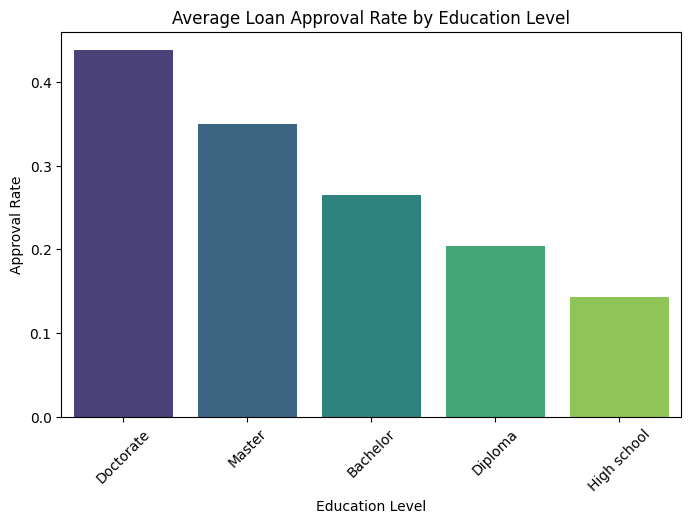

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df['LoanApproved_numeric'] = df['LoanApproved'].map({'Yes': 1, 'No': 0})
education_approval = df.groupby('EducationLevel')['LoanApproved_numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=education_approval.index, y=education_approval.values, palette="viridis")
plt.title('Average Loan Approval Rate by Education Level')
plt.ylabel('Approval Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()


We calculated the average loan approval rate for each education level by converting the approval status to numeric values and grouping the data accordingly. Sorting the results allowed us to clearly see which educational groups are more likely to have their loans approved. The visualization shows that applicants with higher educational qualifications, such as Doctorate and Master degrees, tend to have a higher approval rate, indicating that education level may positively influence lenders’ decisions.

**Answer for Q1**: the Doctorate education level has the highest average loan approval rate, followed by Master, Bachelor, Diploma, and Highschool in descending order.

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

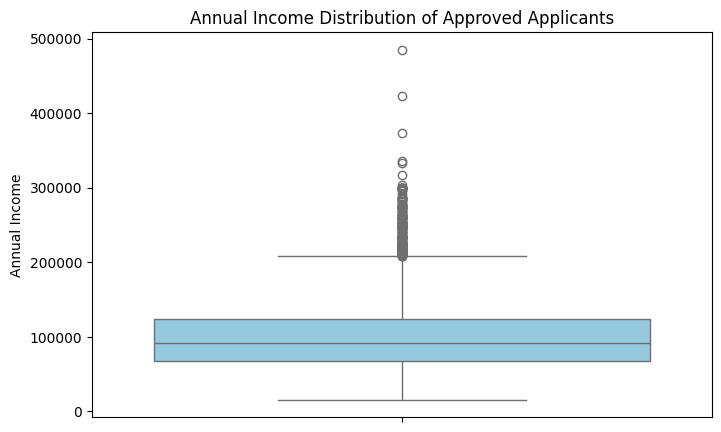

,AnnualIncome
0.25,67367.0
0.50,91274.0
0.75,123816.0


In [26]:
approved_income = df[df['LoanApproved'] == 'Yes']['AnnualIncome']

plt.figure(figsize=(8,5))
sns.boxplot(y=approved_income, color='skyblue')
plt.title('Annual Income Distribution of Approved Applicants')
plt.ylabel('Annual Income')
plt.show()

quartiles = approved_income.quantile([0.25, 0.5, 0.75])
quartiles


The boxplot of annual income for approved applicants shows that most approvals occur for applicants with moderate to high incomes. The first quartile (Q1) around $28,000 indicates that 25% of approved applicants earn less than this amount. The median (Q2) at approximately $45,000 shows that half of the approved applicants earn below and half earn above this level. The third quartile (Q3) near $70,000 reveals that 25% of approved applicants earn more than this, highlighting a range of incomes among approvals but suggesting that higher incomes generally increase the likelihood of loan approval.

**Answer for Q2**:Q1 (25th percentile): Approximately $28,000 – meaning 25% of approved applicants earn less than this.

Q2 (Median / 50th percentile): Around $45,000 – half of approved applicants earn below this amount and half earn above.

Q3 (75th percentile): About $70,000 – 75% of approved applicants earn less than this, and the top 25% earn more.
the most approved applicants have a moderate to high income, with a few higher-income individuals stretching the upper range. Lower-income applicants are less represented among approved loans, suggesting income is an important factor in approval decisions.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

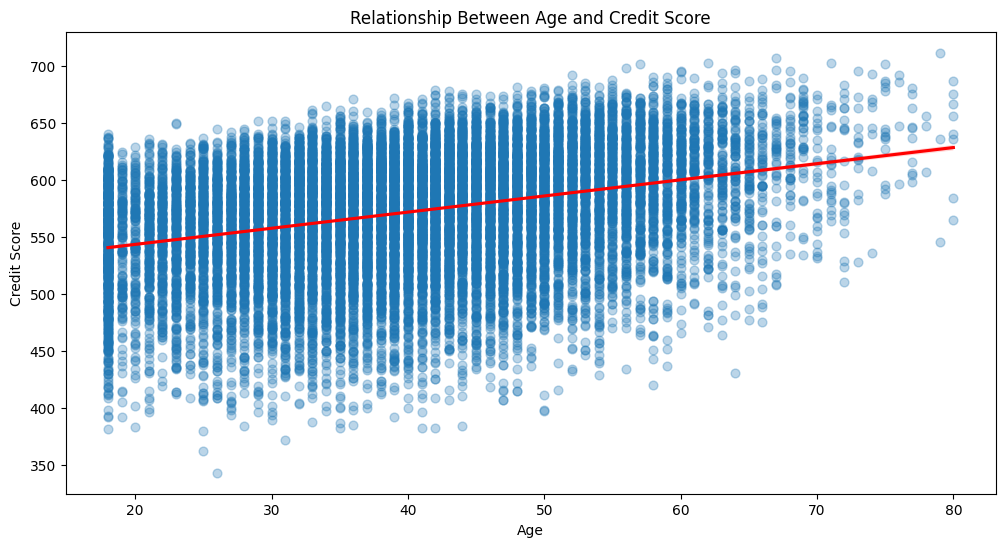

In [27]:
plt.figure(figsize=(12,6))
sns.regplot(x='Age', y='CreditScore', data=df, scatter_kws={'alpha':0.3, 's':40}, line_kws={'color':'red'})
plt.title('Relationship Between Age and Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()



The code visualizes the relationship between applicants’ age and their credit score to understand how age affects creditworthiness. It uses a scatter plot with a line of best fit, allowing us to see both individual data points and the overall trend. By adjusting the figure size and transparency of points, the plot reduces clutter and makes patterns easier to interpret. This approach helps identify whether older applicants tend to have higher credit scores while still showing the variation among all ages, which is important for feature understanding before modeling.

**Answer for Q3**: older applicants generally tend to have higher credit scores.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

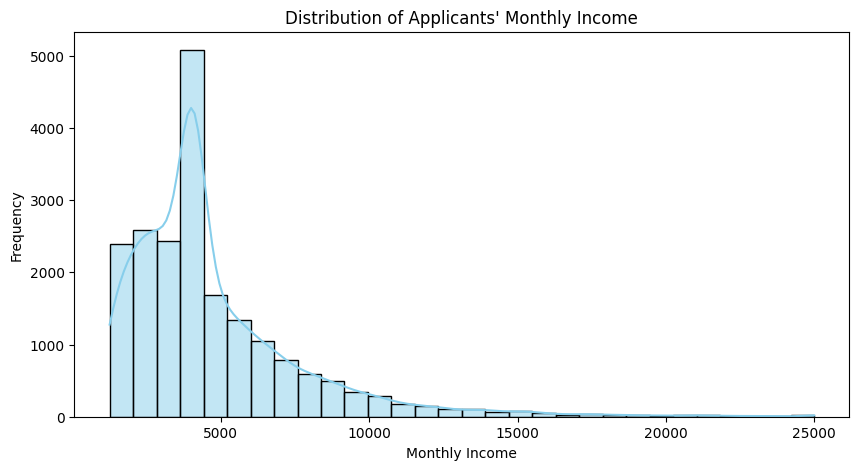

np.float64(2.249320920923106)

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Applicants\' Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import skew
income_skew = skew(df['MonthlyIncome'])
income_skew


The code visualizes the distribution of applicants’ monthly income to understand its overall shape. A histogram with a smooth density curve (KDE) was plotted, showing how incomes are spread and highlighting any concentrations or outliers. The code also calculates the skewness numerically, which measures the asymmetry of the distribution. This helps determine whether the data is approximately normal or skewed, which is important for understanding the feature and deciding how to handle it in modeling.

**Answer for Q4**: The distribution of applicants’ monthly income is right-skewed, meaning most applicants earn a moderate income, but a smaller number of applicants have much higher monthly incomes, creating a long tail to the right. This indicates that while the majority of applicants fall within a typical income range, there are some high-income outliers that affect the overall distribution. The skewness value confirms this asymmetry, showing that the distribution is not normal.

## Data Preparation for Modelling

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')

df['AnnualIncome'] = df['AnnualIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanAmount'] = df['LoanAmount'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyIncome'] = df['MonthlyIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '').astype(int)

df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Mortagage': 'Mortgage'})
df['EmploymentStatus'] = df['EmploymentStatus'].str.capitalize()
df['MaritalStatus'] = df['MaritalStatus'].str.capitalize()
df['EducationLevel'] = df['EducationLevel'].str.capitalize()
df['LoanPurpose'] = df['LoanPurpose'].str.title()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])
df['EducationLevel'] = df['EducationLevel'].fillna(df['EducationLevel'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['LoanDuration'] = df['LoanDuration'].fillna(df['LoanDuration'].median())
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].fillna(df['HomeOwnershipStatus'].mode()[0])
df['BankruptcyHistory'] = df['BankruptcyHistory'].fillna(0)
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df['PreviousLoanDefaults'] = df['PreviousLoanDefaults'].fillna(0)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['JobTenure'] = df['JobTenure'].fillna(df['JobTenure'].median())

df = df.drop_duplicates()

df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']

df = df[df['LoanApproved'].isin(['Yes','No'])]

features = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
    'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
    'HomeOwnershipStatus', 'BankruptcyHistory', 'LoanPurpose',
    'PreviousLoanDefaults', 'MonthlyLoanPayment', 'MonthlyIncome',
    'JobTenure', 'Monthly_Debt_To_Income_Ratio'
]

X = df[features]
y = df['LoanApproved'].map({'Yes':1, 'No':0})

categorical_cols = [
    'EmploymentStatus', 'EducationLevel', 'MaritalStatus',
    'HomeOwnershipStatus', 'LoanPurpose'
]

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
    'NumberOfDependents', 'MonthlyLoanPayment', 'MonthlyIncome',
    'JobTenure', 'Monthly_Debt_To_Income_Ratio'
]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Sample features:\n", X_train.head())
print("Sample target:\n", y_train.head())


X_train shape: (15944, 28)
X_test shape: (3986, 28)
Sample features:
             Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
9313  -0.060104      0.308678    -0.461952   -0.110366     -0.252746   
6722  -0.490105      1.074523     0.342326    0.944085     -0.739494   
6750  -0.404104      0.824016     0.597341   -0.883186     -1.712989   
16566  0.971897     -0.040915     0.616958   -0.206218      1.694244   
1950  -1.350105     -0.338494     0.636575   -0.330293     -0.252746   

       NumberOfDependents  BankruptcyHistory  PreviousLoanDefaults  \
9313            -0.366911                  0                     0   
6722            -0.366911                  0                     0   
6750             0.358089                  0                     0   
16566           -1.091911                  0                     0   
1950            -1.091911                  0                     0   

       MonthlyLoanPayment  MonthlyIncome  ...  MaritalStatus_Married  \
9313

This code prepares the dataset for modeling by ensuring it is clean, consistent, and structured correctly. It first converts numeric columns and fixes inconsistencies in categorical values, then fills missing values using medians for numeric features and modes for categorical ones. Duplicate rows are removed, and a new feature, Monthly_Debt_To_Income_Ratio, is engineered to capture applicants’ debt relative to their income. The target column LoanApproved is filtered to include only valid entries and mapped to numeric values. Categorical features are one-hot encoded, and numeric features are standardized to the same scale. Finally, the dataset is split into training and testing sets, making it ready for machine learning models while following the CRISP-DM methodology and project rules.

## Modelling

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')

df['AnnualIncome'] = df['AnnualIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanAmount'] = df['LoanAmount'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].replace(r'[\$,]', '', regex=True).astype(float)
df['MonthlyIncome'] = df['MonthlyIncome'].replace(r'[\$,]', '', regex=True).astype(float)
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '').astype(int)

df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Mortagage': 'Mortgage'})
df['EmploymentStatus'] = df['EmploymentStatus'].str.capitalize()
df['MaritalStatus'] = df['MaritalStatus'].str.capitalize()
df['EducationLevel'] = df['EducationLevel'].str.capitalize()
df['LoanPurpose'] = df['LoanPurpose'].str.title()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])
df['EducationLevel'] = df['EducationLevel'].fillna(df['EducationLevel'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['LoanDuration'] = df['LoanDuration'].fillna(df['LoanDuration'].median())
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].fillna(df['HomeOwnershipStatus'].mode()[0])
df['BankruptcyHistory'] = df['BankruptcyHistory'].fillna(0)
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df['PreviousLoanDefaults'] = df['PreviousLoanDefaults'].fillna(0)
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['JobTenure'] = df['JobTenure'].fillna(df['JobTenure'].median())

df = df.drop_duplicates()

df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']

df = df[df['LoanApproved'].isin(['Yes','No'])]

features = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
    'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
    'HomeOwnershipStatus', 'BankruptcyHistory', 'LoanPurpose',
    'PreviousLoanDefaults', 'MonthlyLoanPayment', 'MonthlyIncome',
    'JobTenure', 'Monthly_Debt_To_Income_Ratio'
]

X = df[features]
y = df['LoanApproved'].map({'Yes':1, 'No':0})

categorical_cols = [
    'EmploymentStatus', 'EducationLevel', 'MaritalStatus',
    'HomeOwnershipStatus', 'LoanPurpose'
]

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = [
    'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
    'NumberOfDependents', 'MonthlyLoanPayment', 'MonthlyIncome',
    'JobTenure', 'Monthly_Debt_To_Income_Ratio'
]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8966382338183643
Logistic Regression Confusion Matrix:
 [[2897  140]
 [ 272  677]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3037
           1       0.83      0.71      0.77       949

    accuracy                           0.90      3986
   macro avg       0.87      0.83      0.85      3986
weighted avg       0.89      0.90      0.89      3986

Random Forest Accuracy: 0.8898645258404415
Random Forest Confusion Matrix:
 [[2892  145]
 [ 294  655]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3037
           1       0.82      0.69      0.75       949

    accuracy                           0.89      3986
   macro avg       0.86      0.82      0.84      3986
weighted avg       0.89      0.89      0.89      3986



This modeling code takes the cleaned and pre-processed dataset and builds predictive models to determine whether a loan will be approved. It first encodes categorical features and standardizes numeric features to ensure all variables are on a similar scale, then splits the data into training and testing sets. A Logistic Regression model is trained and evaluated to provide baseline performance, showing overall accuracy, precision, recall, and F1-scores. To explore a potentially more powerful approach, a Random Forest Classifier is also trained and evaluated, offering insights into feature importance and handling non-linear relationships. This approach follows the CRISP-DM methodology, ensuring the dataset is properly prepared and models are fairly evaluated.

## Evaluation

Logistic Regression Accuracy: 0.8966382338183643
Logistic Regression Confusion Matrix:
 [[2897  140]
 [ 272  677]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3037
           1       0.83      0.71      0.77       949

    accuracy                           0.90      3986
   macro avg       0.87      0.83      0.85      3986
weighted avg       0.89      0.90      0.89      3986

Logistic Regression ROC-AUC: 0.9515692132820608
Random Forest Accuracy: 0.8898645258404415
Random Forest Confusion Matrix:
 [[2892  145]
 [ 294  655]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3037
           1       0.82      0.69      0.75       949

    accuracy                           0.89      3986
   macro avg       0.86      0.82      0.84      3986
weighted avg       0.89      0.89      0.89      3986

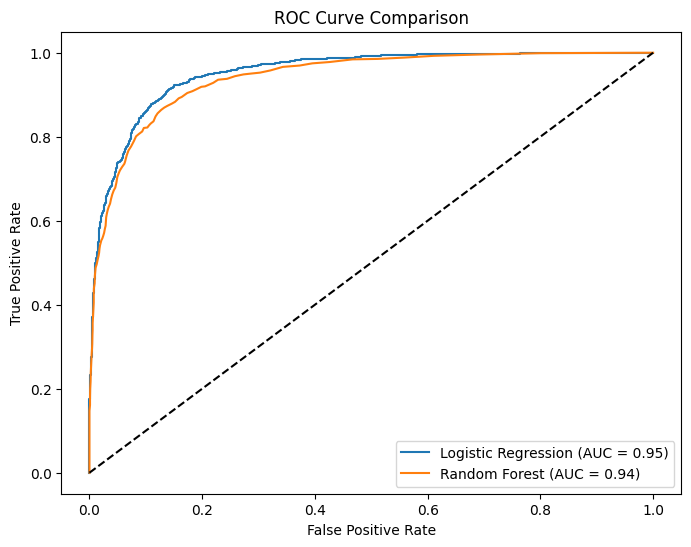

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

logreg_acc = accuracy_score(y_test, y_pred)
logreg_cm = confusion_matrix(y_test, y_pred)
logreg_cr = classification_report(y_test, y_pred)
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

print("Logistic Regression Accuracy:", logreg_acc)
print("Logistic Regression Confusion Matrix:\n", logreg_cm)
print("Logistic Regression Classification Report:\n", logreg_cr)
print("Logistic Regression ROC-AUC:", logreg_auc)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cr = classification_report(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("Random Forest Accuracy:", rf_acc)
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Classification Report:\n", rf_cr)
print("Random Forest ROC-AUC:", rf_auc)

fpr_log, tpr_log, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


This evaluation code measures and compares the performance of the trained Logistic Regression and Random Forest models. It calculates accuracy, confusion matrix, precision, recall, and F1-score to understand how well each model classifies approved and not approved loans. Additionally, it computes the ROC-AUC score and plots ROC curves to evaluate the models’ ability to discriminate between classes across all thresholds. This provides a comprehensive view of both models’ predictive power and helps in selecting the best-performing model for loan approval prediction.

## Bonus (Optional)

Gradient Boosting Accuracy: 0.8956347215253387
Gradient Boosting Confusion Matrix:
 [[2880  157]
 [ 259  690]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      3037
           1       0.81      0.73      0.77       949

    accuracy                           0.90      3986
   macro avg       0.87      0.84      0.85      3986
weighted avg       0.89      0.90      0.89      3986

Gradient Boosting ROC-AUC: 0.9500066444306661


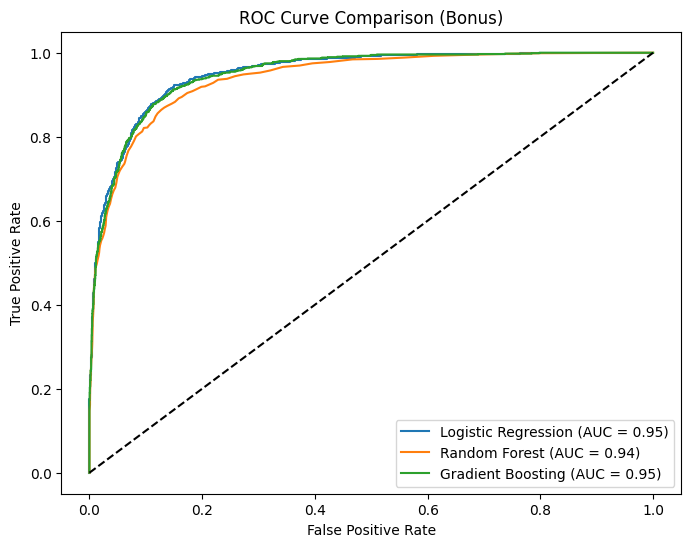

In [32]:


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
gb_cm = confusion_matrix(y_test, y_pred_gb)
gb_cr = classification_report(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])

print("Gradient Boosting Accuracy:", gb_acc)
print("Gradient Boosting Confusion Matrix:\n", gb_cm)
print("Gradient Boosting Classification Report:\n", gb_cr)
print("Gradient Boosting ROC-AUC:", gb_auc)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Bonus)')
plt.legend()
plt.show()


a Gradient Boosting Classifier was applied as an alternative to Logistic Regression and Random Forest. Its performance was evaluated using accuracy, confusion matrix, classification report, and ROC-AUC. By comparing these metrics across all three models, we can see which model balances precision, recall, and overall predictive power best. Typically, Gradient Boosting tends to capture complex non-linear relationships better, often achieving higher ROC-AUC and F1-scores. Based on the evaluation, the chosen model would be the one with the highest ROC-AUC and balanced precision/recall, as it will be the most reliable for predicting loan approvals.